<a href="https://colab.research.google.com/github/ProgramasParaFisicaDeParticulas/DelPerceptonAlQubit/blob/main/regresion_logistica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Librerías y functiones auxiliares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.datasets import make_moons

In [ ]:
color_magenta = '#E91E63'    # Magenta principal
color_azul = '#2196F3'       # Azul medio
color_cyan = '#00BCD4'       # Cyan/turquesa
color_violeta = "#A816C2"    # Violeta
color_verde = '#4CAF50'      # Verde complementario


def visualizar_funcion_costo_logistica(X, y_true, costo_bce, hipotesis, w_actual, b_actual, costos, w_hist, b_hist, titulo_punto="Punto actual"):
    """
    Visualiza la función de costo BCE y convergencia con mapa de probabilidades

    Parámetros:
    X: datos de entrada (features)
    y_true: etiquetas reales
    costo_bce: función de costo
    hipotesis: función hipótesis
    w_actual: pesos actuales [w1, w2]
    b_actual: bias actual
    costos: historial de costos
    w_hist: historial de w
    b_hist: historial de b
    titulo_punto: etiqueta para el punto marcado
    """
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.gridspec as gridspec

    w1_range = np.linspace(-1, 4, 50)
    w2_range = np.linspace(-6, 1, 50)
    W1, W2 = np.meshgrid(w1_range, w2_range)

    J = np.zeros_like(W1)
    for i in range(len(w1_range)):
        for j in range(len(w2_range)):
            w_temp = np.array([W1[j, i], W2[j, i]])
            J[j, i] = costo_bce(X, y_true, w_temp, b_actual)

    clear_output(True)
    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(3, 4, figure=fig, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[:, 0:2], projection='3d', computed_zorder=False)
    surf = ax1.plot_surface(W1, W2, J, cmap='cool', alpha=0.8)
    ax1.set_xlabel('w1', fontsize=12, color='#333333')
    ax1.set_ylabel('w2', fontsize=12, color='#333333')
    ax1.set_zlabel('Costo BCE', fontsize=12, color='#333333')
    ax1.set_title('Función de Costo BCE (3D)', fontsize=14, fontweight='bold', color='#333333')

    ax1.view_init(elev=40, azim=45)

    costo_actual = costo_bce(X, y_true, w_actual, b_actual)
    elevacion = (J.max() - J.min()) * 0.05
    z_punto = costo_actual + elevacion

    ax1.scatter([w_actual[0]], [w_actual[1]], [z_punto],
                color=color_magenta, s=150, label=titulo_punto,
                edgecolors='white', linewidth=2, alpha=0.9, zorder=10)

    ax1.plot([w_actual[0], w_actual[0]], [w_actual[1], w_actual[1]], [costo_actual, z_punto],
             color=color_magenta, linewidth=2, alpha=0.6)

    ax1.legend(fontsize=12)

    ax2 = fig.add_subplot(gs[0:2, 2:4])

    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    malla_points = np.c_[xx.ravel(), yy.ravel()]
    z_malla = hipotesis(malla_points, w_actual, b_actual)
    z_malla = z_malla.reshape(xx.shape)

    contour = ax2.contourf(xx, yy, z_malla, levels=50, alpha=0.8, cmap='RdYlBu')

    ax2.contour(xx, yy, z_malla, levels=[0.5], colors='white', linewidths=3, alpha=0.8)

    scatter0 = ax2.scatter(X[y_true==0, 0], X[y_true==0, 1], c=color_azul, marker='o', s=60,
                          edgecolors='white', linewidth=1, label='Clase 0', alpha=0.8)
    scatter1 = ax2.scatter(X[y_true==1, 0], X[y_true==1, 1], c=color_magenta, marker='s', s=60,
                          edgecolors='white', linewidth=1, label='Clase 1', alpha=0.8)

    ax2.set_xlabel('X1', fontsize=12, color='#333333')
    ax2.set_ylabel('X2', fontsize=12, color='#333333')
    ax2.set_title('Mapa de Probabilidades', fontsize=14, fontweight='bold', color='#333333')
    ax2.legend(fontsize=11)
    ax2.set_facecolor('#FAFAFA')

    cbar = plt.colorbar(contour, ax=ax2)
    cbar.set_label('P(y=1)', rotation=270, labelpad=15)

    ax3 = fig.add_subplot(gs[2, 2])
    if costos is not None:
        ax3.plot(costos, color=color_violeta, linewidth=3, alpha=0.8)
        ax3.set_xlabel('Iteraciones', color='#333333')
        ax3.set_ylabel('Costo BCE', color='#333333')
        ax3.set_title('Convergencia del Costo', color='#333333', fontweight='bold')
        ax3.grid(True, alpha=0.3, color='#CCCCCC')
        ax3.set_facecolor('#FAFAFA')
    else:
        ax3.text(0.5, 0.5, 'Ejecutar entrenamiento\npara ver convergencia',
                ha='center', va='center', transform=ax3.transAxes, color='#666666')
        ax3.set_title('Convergencia del Costo', color='#333333')

    ax4 = fig.add_subplot(gs[2, 3])
    contour_bg = ax4.contourf(W1, W2, J, levels=10, cmap='cool', alpha=0.6)
    contour_lines = ax4.contour(W1, W2, J, levels=15, alpha=0.3, colors='white', linewidths=0.5)
    ax4.clabel(contour_lines, inline=True, fontsize=7, colors='white')

    if w_hist is not None and b_hist is not None:
        w_hist_array = np.array(w_hist)
        ax4.plot(w_hist_array[:, 0], w_hist_array[:, 1], color=color_magenta, linewidth=3, alpha=0.8, label='Trayectoria')
        ax4.scatter([w_hist_array[0, 0]], [w_hist_array[0, 1]], color=color_verde, s=100, marker='o',
                   label='Inicio', edgecolors='white', linewidth=2)
        ax4.scatter([w_actual[0]], [w_actual[1]], color=color_magenta, s=100, marker='s',
                   label='Actual', edgecolors='white', linewidth=2)
    else:
        ax4.scatter([w_actual[0]], [w_actual[1]], color=color_magenta, s=100, marker='x', label=titulo_punto)

    ax4.set_xlabel('w1', color='#333333')
    ax4.set_ylabel('w2', color='#333333')
    ax4.set_title('Trayectoria GD', color='#333333', fontweight='bold')
    ax4.legend(fontsize=9)
    ax4.grid(True, alpha=0.3, color='#CCCCCC')
    ax4.set_facecolor('#FAFAFA')

    fig.patch.set_facecolor('white')

    plt.show()

    print(f"Costo en w=[{w_actual[0]:.4f}, {w_actual[1]:.4f}], b={b_actual:.4f}: {costo_bce(X, y_true, w_actual, b_actual):.4f}")



def visualizar_entrenamiento_poly(X, y, X_poly, w_actual, costos, w_hist, grado, iteracion, titulo_punto="Punto actual"):
    """
    Visualiza el entrenamiento de regresión logística con features polinomiales
    Enfoque en mapa de probabilidades y métricas relevantes para múltiples parámetros
    """
    import matplotlib.gridspec as gridspec

    clear_output(True)
    fig = plt.figure(figsize=(20, 10))
    gs = gridspec.GridSpec(2, 4, figure=fig, hspace=0.3, wspace=0.3)

    ax1 = fig.add_subplot(gs[:, 0:2])

    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    malla_points = np.c_[xx.ravel(), yy.ravel()]
    X_malla_poly = crear_features_polinomiales(malla_points, grado)
    z_malla = hipotesis_poly(X_malla_poly, w_actual)
    z_malla = z_malla.reshape(xx.shape)

    contour = ax1.contourf(xx, yy, z_malla, levels=50, alpha=0.8, cmap='RdYlBu')

    ax1.contour(xx, yy, z_malla, levels=[0.1, 0.3, 0.5, 0.7, 0.9],
               colors='white', linewidths=[1, 1, 3, 1, 1], alpha=0.8)

    scatter0 = ax1.scatter(X[y==0, 0], X[y==0, 1], c=color_azul, marker='o', s=60,
                          edgecolors='white', linewidth=1, label='Clase 0', alpha=0.8, zorder=5)
    scatter1 = ax1.scatter(X[y==1, 0], X[y==1, 1], c=color_magenta, marker='s', s=60,
                          edgecolors='white', linewidth=1, label='Clase 1', alpha=0.8, zorder=5)

    ax1.set_xlabel('X1', fontsize=14, color='#333333')
    ax1.set_ylabel('X2', fontsize=14, color='#333333')
    ax1.set_title(f'Mapa de Probabilidades - Grado {grado} ({iteracion})', fontsize=16, fontweight='bold', color='#333333')
    ax1.legend(fontsize=12)
    ax1.set_facecolor('#FAFAFA')

    cbar = plt.colorbar(contour, ax=ax1)
    cbar.set_label('P(y=1)', rotation=270, labelpad=15, fontsize=12)

    ax2 = fig.add_subplot(gs[0, 2])
    if costos is not None and len(costos) > 1:
        ax2.plot(costos, color=color_violeta, linewidth=3, alpha=0.8)
        ax2.set_xlabel('Iteraciones', color='#333333', fontsize=12)
        ax2.set_ylabel('Costo BCE', color='#333333', fontsize=12)
        ax2.set_title('Convergencia del Costo', color='#333333', fontweight='bold', fontsize=14)
        ax2.grid(True, alpha=0.3, color='#CCCCCC')
        ax2.set_facecolor('#FAFAFA')

        if len(costos) > 1:
            mejora = ((costos[0] - costos[-1]) / costos[0]) * 100
            ax2.text(0.02, 0.98, f'Mejora: {mejora:.1f}%', transform=ax2.transAxes,
                    verticalalignment='top', fontsize=10, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    ax3 = fig.add_subplot(gs[0, 3])

    h_actual = hipotesis_poly(X_poly, w_actual)
    pred_actual = (h_actual >= 0.5).astype(int)
    precision_actual = np.mean(pred_actual == y)

    ax3.text(0.1, 0.85, f'Precisión: {precision_actual:.1%}', fontsize=16, fontweight='bold',
            transform=ax3.transAxes, color=color_magenta)
    ax3.text(0.1, 0.7, f'Costo: {costos[-1] if costos else 0:.4f}', fontsize=14,
            transform=ax3.transAxes, color='#333333')
    ax3.text(0.1, 0.55, f'Parámetros: {len(w_actual)}', fontsize=14,
            transform=ax3.transAxes, color='#333333')
    ax3.text(0.1, 0.4, f'Grado: {grado}', fontsize=14,
            transform=ax3.transAxes, color='#333333')
    ax3.text(0.1, 0.25, f'Iteración: {iteracion}', fontsize=14,
            transform=ax3.transAxes, color='#333333')

    # progress_width = precision_actual
    # ax3.barh(0.1, progress_width, height=0.08, color=color_cyan, alpha=0.7, transform=ax3.transAxes)
    # ax3.text(0.1, 0.05, 'Progreso', fontsize=12, transform=ax3.transAxes, color='#333333')

    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_title('Métricas del Modelo', color='#333333', fontweight='bold', fontsize=14)
    ax3.axis('off')

    ax4 = fig.add_subplot(gs[1, 2])

    prob_clase_0 = h_actual[y == 0]
    prob_clase_1 = h_actual[y == 1]

    ax4.hist(prob_clase_0, bins=15, alpha=0.7, color=color_azul, label='Clase 0', density=True)
    ax4.hist(prob_clase_1, bins=15, alpha=0.7, color=color_magenta, label='Clase 1', density=True)
    ax4.axvline(x=0.5, color='white', linestyle='--', linewidth=2, label='Umbral')

    ax4.set_xlabel('Probabilidad P(y=1)', fontsize=12, color='#333333')
    ax4.set_ylabel('Densidad', fontsize=12, color='#333333')
    ax4.set_title('Distribución de Probabilidades', fontsize=14, fontweight='bold', color='#333333')
    ax4.legend(fontsize=10)
    ax4.grid(True, alpha=0.3, color='#CCCCCC')
    ax4.set_facecolor('#FAFAFA')

    ax5 = fig.add_subplot(gs[1, 3])

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, pred_actual)

    im = ax5.imshow(cm, interpolation='nearest', cmap='Blues', alpha=0.8)
    ax5.set_title('Matriz de Confusión', fontsize=14, fontweight='bold', color='#333333')

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax5.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center", fontsize=16, fontweight='bold',
                    color="white" if cm[i, j] > thresh else "black")

    ax5.set_ylabel('Clase Real', fontsize=12, color='#333333')
    ax5.set_xlabel('Clase Predicha', fontsize=12, color='#333333')
    ax5.set_xticks([0, 1])
    ax5.set_yticks([0, 1])
    ax5.set_xticklabels(['0', '1'])
    ax5.set_yticklabels(['0', '1'])

    fig.patch.set_facecolor('white')

    plt.show()

    errores = np.sum(pred_actual != y)
    print(f"Iteración {iteracion}: Costo={costos[-1] if costos else 0:.4f}, "
          f"Precisión={precision_actual:.1%}, Errores={errores}/{len(y)}")

# Regresión Logística varias caracteristicas

## Objetivos de este Notebook

Este notebook presenta una implementación didáctica de **regresión logística** desde cero, diseñada para comprender los conceptos fundamentales de clasificación binaria. Los objetivos son:

1. **Generar datos sintéticos** con distribución de medias lunas (no linealmente separable)
2. **Implementar la función sigmoide** para transformar valores lineales en probabilidades
3. **Definir la función de costo BCE** (Binary Cross-Entropy)
4. **Visualizar la función de costo** en 3D para observar su forma
5. **Implementar el algoritmo de gradiente descendente** para optimización
6. **Mostrar el mapa de probabilidades** en lugar del ajuste lineal
7. **Demostrar la convergencia** al mínimo de la función

## Conceptos Clave

### Regresión Logística
La regresión logística es un algoritmo de aprendizaje supervisado que modela la probabilidad de que una instancia pertenezca a una clase específica mediante la función sigmoide.

### Función Hipótesis Sigmoide
Nuestra función hipótesis es:
$$h(x) = \sigma(z) = \frac{1}{1 + e^{-z}}$$

Donde $z = w_1 x_1 + w_2 x_2 + b$:
- $w_1, w_2$: pesos de las características
- $b$: sesgo (bias) - término independiente

### Función de Costo BCE (Binary Cross-Entropy)
Para medir qué tan bien nuestro modelo clasifica, usamos:
$$J(w_1, w_2, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h(x^{(i)})) + (1-y^{(i)}) \log(1-h(x^{(i)}))\right]$$

Donde:
- $m$ = número de ejemplos de entrenamiento
- $h(x^{(i)})$ = probabilidad predicha para el ejemplo $i$
- $y^{(i)}$ = etiqueta real del ejemplo $i$ (0 o 1)

---

## 1. Generación de Datos Sintéticos

En esta sección creamos datos artificiales con forma de medias lunas que **no son linealmente separables**. Esto nos permite:

- **Demostrar las limitaciones lineales**: Una línea recta no puede separar perfectamente estas clases
- **Justificar el uso de la sigmoide**: Necesitamos una función que modele probabilidades
- **Añadir complejidad realista**: Los datos reales de clasificación rara vez son linealmente separables
- **Validar nuestro algoritmo**: Podemos verificar si encuentra un buen límite de decisión

### ¿Qué hace el código?

1. **`np.random.seed(42)`**: Fija la semilla para reproducibilidad
2. **`make_moons()`**: Genera datos con forma de medias lunas entrelazadas
3. **`noise=0.1`**: Añade ruido gaussiano para hacer el problema más realista
4. **Dos clases**:
   - **Clase 0** (círculos azules): Una media luna
   - **Clase 1** (cuadrados magenta): La otra media luna entrelazada

### Interpretación del Gráfico
- **Puntos azules**: Ejemplos de la clase 0
- **Puntos magenta**: Ejemplos de la clase 1  
- **Patrón no lineal**: Las clases forman dos medias lunas entrelazadas
- **Desafío**: Ninguna línea recta puede dividir perfectamente las clases

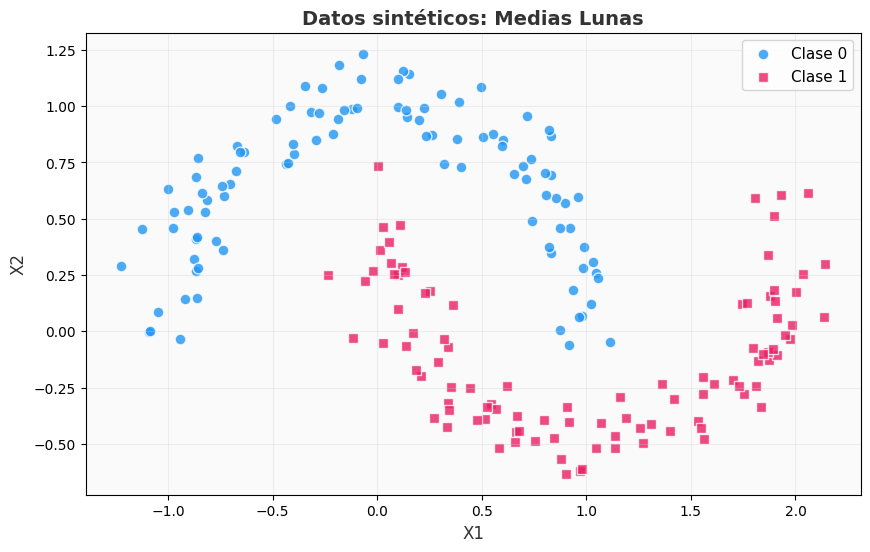

Datos generados: 200 ejemplos
Features: 2 (X1, X2)
Distribución de clases: Clase 0: 100, Clase 1: 100


In [ ]:
# Generación de datos sintéticos con forma de medias lunas
np.random.seed(42)
m = 200
X, y_true = make_moons(n_samples=m, noise=0.1, random_state=42)

plt.figure(figsize=(10, 6))
scatter0 = plt.scatter(X[y_true==0, 0], X[y_true==0, 1], c=color_azul, marker='o', s=60,
                      edgecolors='white', linewidth=1, label='Clase 0', alpha=0.8)
scatter1 = plt.scatter(X[y_true==1, 0], X[y_true==1, 1], c=color_magenta, marker='s', s=60,
                      edgecolors='white', linewidth=1, label='Clase 1', alpha=0.8)

plt.xlabel('X1', fontsize=12, color='#333333')
plt.ylabel('X2', fontsize=12, color='#333333')
plt.title('Datos sintéticos: Medias Lunas', fontsize=14, fontweight='bold', color='#333333')
plt.grid(True, alpha=0.3, color='#CCCCCC')
plt.legend(fontsize=11)
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('white')
plt.show()

print(f"Datos generados: {m} ejemplos")
print(f"Features: {X.shape[1]} (X1, X2)")
print(f"Distribución de clases: Clase 0: {np.sum(y_true==0)}, Clase 1: {np.sum(y_true==1)}")

## 2. Función Sigmoide y Función de Costo BCE

### Función Sigmoide
La función sigmoide es el corazón de la regresión logística. Transforma cualquier valor real en una probabilidad:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Donde $z = w_1 x_1 + w_2 x_2 + b$ es la combinación lineal de nuestras características.

#### ¿Por qué la Sigmoide?
- **Salida en [0,1]**: Siempre produce una probabilidad válida
- **Forma de S**: Transición suave de 0 a 1
- **Punto de decisión natural**: $\sigma(0) = 0.5$
- **Diferenciable**: Permite usar gradiente descendente
- **Interpretación**: $h(x) = P(y=1|x)$ es la probabilidad de que pertenezca a la clase 1

### Función de Costo BCE (Binary Cross-Entropy)
Para clasificación binaria, usamos el error de entropía cruzada binaria:

$$J(w_1, w_2, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[y^{(i)} \log(h(x^{(i)})) + (1-y^{(i)}) \log(1-h(x^{(i)}))\right]$$

#### ¿Por qué BCE?
- **Penaliza confianza incorrecta**: Si $y=1$ y $h(x) \approx 0$, el costo explota
- **Recompensa confianza correcta**: Si $y=1$ y $h(x) \approx 1$, el costo es bajo
- **Convexo**: Garantiza convergencia al mínimo global
- **Probabilísticamente fundamentado**: Deriva de la máxima verosimilitud

#### Interpretación del Código
- **`costo_inicial`**: Con parámetros aleatorios, el costo debería estar cerca de $\ln(2) \approx 0.693$
- **Estabilidad numérica**: Usamos `np.clip()` para evitar `log(0)`

El objetivo del aprendizaje es encontrar los valores de $w_1$, $w_2$ y $b$ que minimicen $J(w_1, w_2, b)$.

In [ ]:
def normalization(x):
    x_mean = np.mean(x, axis=0)
    x_std = np.std(x, axis=0)
    x_std[x_std < 1e-16] = 1.0
    return (x - x_mean) / x_std

def sigmoide(z):
    """
    Función sigmoide: σ(z) = 1 / (1 + e^(-z))
    z: combinación lineal w1*x1 + w2*x2 + b
    """
    # Estabilidad numérica para evitar overflow
    z_clipped = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z_clipped))

def hipotesis(X, w, b):
    """
    Función hipótesis logística: h(x) = σ(w^T * x + b)
    X: array de features (m, 2)
    w: pesos [w1, w2]
    b: sesgo (bias)
    """
    z = np.dot(X, w) + b
    return sigmoide(z)

def BCE(X, y, w, b):
    """
    Binary Cross-Entropy: función de costo para clasificación binaria
    """
    h = hipotesis(X, w, b)
    # Estabilidad numérica: evitar log(0)
    epsilon = 1e-15
    h_clipped = np.clip(h, epsilon, 1 - epsilon)

    m = len(y)
    return (-1/m) * np.sum(y * np.log(h_clipped) + (1-y) * np.log(1-h_clipped))

def gradient_BCE(X, y, w, b):
    """
    Gradiente de Binary Cross-Entropy
    Retorna las derivadas parciales dC/dw y dC/db
    """
    m = len(y)
    h = hipotesis(X, w, b)

    dC_dw = (1/m) * np.dot(X.T, (h - y))
    dC_db = (1/m) * np.sum(h - y)

    return dC_dw, dC_db

## 3. Algoritmo de Gradiente Descendente con Visualización

El gradiente descendente para regresión logística encuentra los parámetros que minimizarán la función de costo BCE, permitiendo una separación óptima de las clases.

### Intuición del Algoritmo
A diferencia de la regresión lineal donde el paisaje es una parábola suave, en clasificación logística:
1. **Exploramos el paisaje BCE**: Una superficie más compleja pero aún convexa
2. **Seguimos el gradiente**: La dirección de mayor descenso en cada punto
3. **Actualizamos parámetros**: $w := w - \alpha \nabla_w J$ y $b := b - \alpha \nabla_b J$
4. **Convergemos al óptimo**: Encontramos el mejor límite de decisión

### Fórmulas del Gradiente Descendente

#### Actualización de Parámetros:
$$w_1 := w_1 - \alpha \frac{\partial J}{\partial w_1}$$
$$w_2 := w_2 - \alpha \frac{\partial J}{\partial w_2}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

#### Gradientes (Derivadas Parciales):
$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}$$
$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})$$

### Parámetros del Algoritmo

- **$\alpha$ (alpha)**: Tasa de aprendizaje = 0.1
  - Más alta que en regresión lineal debido a la naturaleza de BCE
  - Muy pequeño: Convergencia muy lenta
  - Muy grande: Puede oscilar o diverger
- **Iteraciones**: 1000 pasos de optimización
- **Punto inicial**: Parámetros aleatorios pequeños

### Visualización Durante el Entrenamiento
Durante el proceso se mostrarán **4 paneles simultáneos** que ilustran:
- **Función de costo BCE 3D**: El paisaje de optimización y punto actual
- **Mapa de probabilidades**: Evolución del límite de decisión y regiones de clase
- **Convergencia del costo**: Reducción del error a lo largo del tiempo
- **Trayectoria**: Camino seguido en el espacio de parámetros

### ¿Qué Esperamos Ver?
- **Límite de decisión curvo**: Que separe las medias lunas efectivamente
- **Mapa de probabilidades**: Transición suave del azul (P≈0) al rojo (P≈1)
- **Convergencia estable**: Reducción consistente del costo BCE
- **Clasificación exitosa**: Alta precisión en los datos de entrenamiento

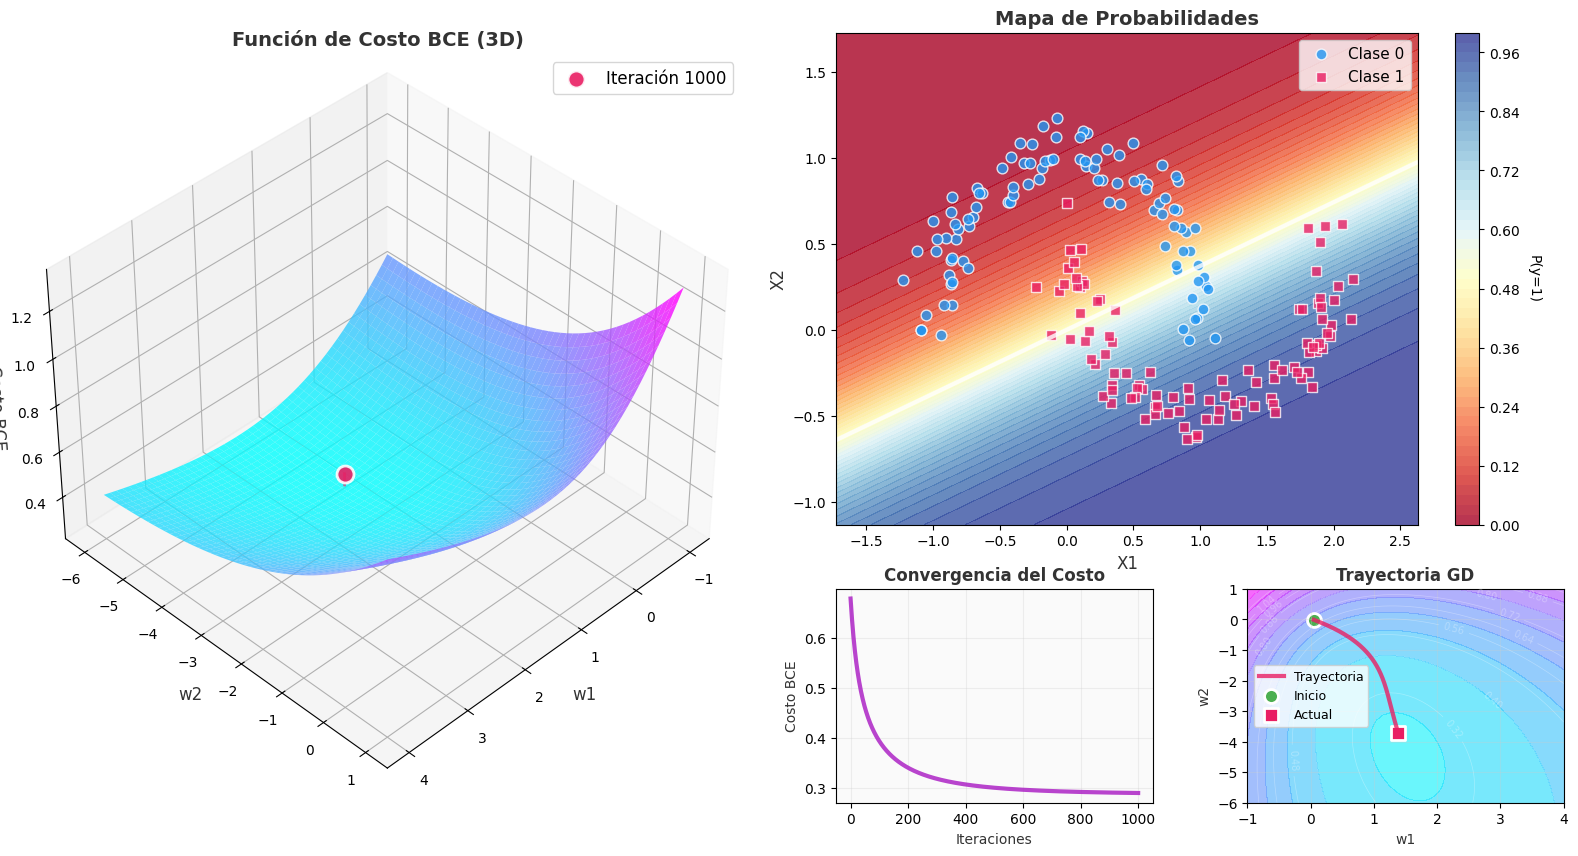

Costo en w=[1.3852, -3.7333], b=0.0000: 0.2896


In [ ]:
def gradiente_descendente_visual_logistica(X, y, w_init, b_init, alpha, iteraciones, mostrar_cada=200):
    """
    Implementa el algoritmo de gradiente descendente para regresión logística con visualización
    X: features
    y: etiquetas (0 o 1)
    w_init, b_init: parámetros iniciales
    alpha: tasa de aprendizaje
    iteraciones: número de iteraciones
    mostrar_cada: cada cuántas iteraciones mostrar la visualización
    """
    m = len(y)
    w, b = w_init.copy(), b_init
    iteraciones += 1

    historial_costo = []
    historial_w = []
    historial_b = []

    for i in range(iteraciones):
        h = hipotesis(X, w, b)

        # Calcular costo
        costo = BCE(X, y, w, b)
        historial_costo.append(costo)
        historial_w.append(w.copy())
        historial_b.append(b)

        # Calcular gradientes
        dC_dw, dC_db = gradient_BCE(X, y, w, b)

        # Actualizar parámetros
        w = w - alpha * dC_dw
        #b = b - alpha * dC_db

        # Visualizar progreso
        if i % mostrar_cada == 0:
            visualizar_funcion_costo_logistica(X, y, BCE, hipotesis, w, b,
                                             historial_costo, historial_w, historial_b,
                                             f"Iteración {i}")

    return w, b, historial_costo, historial_w, historial_b

# Ejecutar gradiente descendente con visualización
w_inicial = np.random.randn(2) * 0.1
b_inicial = 0.0
alpha = 0.1
iteraciones = 1000
mostrar_cada = 200


w_final, b_final, costos, w_hist, b_hist = gradiente_descendente_visual_logistica(
    X, y_true, w_inicial, b_inicial, alpha, iteraciones, mostrar_cada)

## 6. Regresión Logística con Features Polinomiales

### Limitación del Modelo Lineal

Como observamos en el resultado anterior, el modelo con $z = w_1 x_1 + w_2 x_2 + b$ produce un **límite de decisión lineal** (una línea recta). Esto funciona bien para datos linealmente separables, pero nuestras medias lunas requieren un límite **curvo** para una separación óptima.

### Solución: Features Polinomiales

Para capturar patrones no lineales, expandimos nuestro espacio de características añadiendo términos polinomiales:

$$z = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1^2 + w_4 x_1 x_2 + w_5 x_2^2 + w_6 x_1^3 + \ldots$$

#### Ventajas de Features Polinomiales:
- **Límites curvos**: Pueden modelar fronteras complejas
- **Flexibilidad**: Mayor grado = mayor complejidad
- **Interpretabilidad**: Mantiene la estructura lineal en los parámetros
- **Gradientes simples**: Las derivadas siguen siendo lineales en $w$

#### Control de Complejidad:
- **Grado 1**: Solo términos lineales (lo que teníamos)
- **Grado 2**: Añade términos cuadráticos
- **Grado 3**: Añade términos cúbicos
- **Grados altos**: Más flexibilidad pero riesgo de sobreajuste

### Implementación Vectorizada

La función `crear_features_polinomiales()` genera sistemáticamente todos los términos hasta el grado especificado, manteniendo eficiencia computacional.

In [ ]:
def crear_features_polinomiales(X, grado):
    """
    Crea features polinomiales hasta el grado especificado
    X: array de shape (m, 2) con features x1, x2
    grado: grado máximo del polinomio
    Retorna: array con todas las combinaciones polinomiales incluyendo el término independiente
    """
    m = X.shape[0]
    features = [np.ones(m)]

    for i in range(1, grado + 1):
        for j in range(i + 1):
            feature = (X[:, 0] ** (i - j)) * (X[:, 1] ** j)
            features.append(feature)



    return np.column_stack(features)

def hipotesis_poly(X_poly, w):
    """
    Función hipótesis logística con features polinomiales: h(x) = σ(w^T * φ(x))
    X_poly: features polinomiales expandidas
    w: vector de pesos (incluyendo w0 como primer elemento)
    """
    z = np.dot(X_poly, w)
    return sigmoide(z)

def BCE_poly(X_poly, y, w):
    """
    Binary Cross-Entropy con features polinomiales
    """
    h = hipotesis_poly(X_poly, w)
    # Estabilidad numérica: evitar log(0)
    epsilon = 1e-15
    h_clipped = np.clip(h, epsilon, 1 - epsilon)

    m = len(y)
    return (-1/m) * np.sum(y * np.log(h_clipped) + (1-y) * np.log(1-h_clipped))

def gradient_BCE_poly(X_poly, y, w):
    """
    Gradiente de Binary Cross-Entropy con features polinomiales
    Retorna las derivadas parciales dC/dw para todos los pesos
    """
    m = len(y)
    h = hipotesis_poly(X_poly, w)

    # Gradiente vectorizado
    dC_dw = (1/m) * np.dot(X_poly.T, (h - y))

    return dC_dw


### Nueva Función de Visualización para Múltiples Parámetros

Cuando tenemos muchos parámetros (grado 2 = 6 parámetros, grado 3 = 10 parámetros), ya no tiene sentido visualizar la función de costo 3D ni la trayectoria en 2D. En su lugar, nos enfocamos en:

1. **Mapa de Probabilidades (Principal)**: La visualización más importante
2. **Convergencia del Costo**: Para monitorear el entrenamiento  
3. **Evolución de Parámetros**: Para entender cómo cambian los pesos
4. **Métricas de Clasificación**: Precisión en tiempo real

In [ ]:
# Función de entrenamiento adaptada para features polinomiales
def gradiente_descendente_poly(X, y, grado, w_init=None, alpha=0.1, iteraciones=1000, mostrar_cada=200):
    """
    Gradiente descendente para regresión logística con features polinomiales
    """
    X_poly = crear_features_polinomiales(X, grado)
    m, n_features = X_poly.shape

    if w_init is None:
        np.random.seed(42)
        w = np.random.randn(n_features) * 0.01
    else:
        w = w_init.copy()

    iteraciones += 1

    historial_costo = []
    historial_w = []

    for i in range(iteraciones):
        h = hipotesis_poly(X_poly, w)

        # Calcular costo
        costo = BCE_poly(X_poly, y, w)
        historial_costo.append(costo)
        historial_w.append(w.copy())

        # Calcular gradiente
        dC_dw = gradient_BCE_poly(X_poly, y, w)

        # Actualizar parámetros
        w = w - alpha * dC_dw

        # Visualizar progreso
        if i % mostrar_cada == 0:
            visualizar_entrenamiento_poly(X, y, X_poly, w, historial_costo, historial_w,
                                        grado, i, f"Iteración {i}")

    return w, historial_costo, historial_w, X_poly

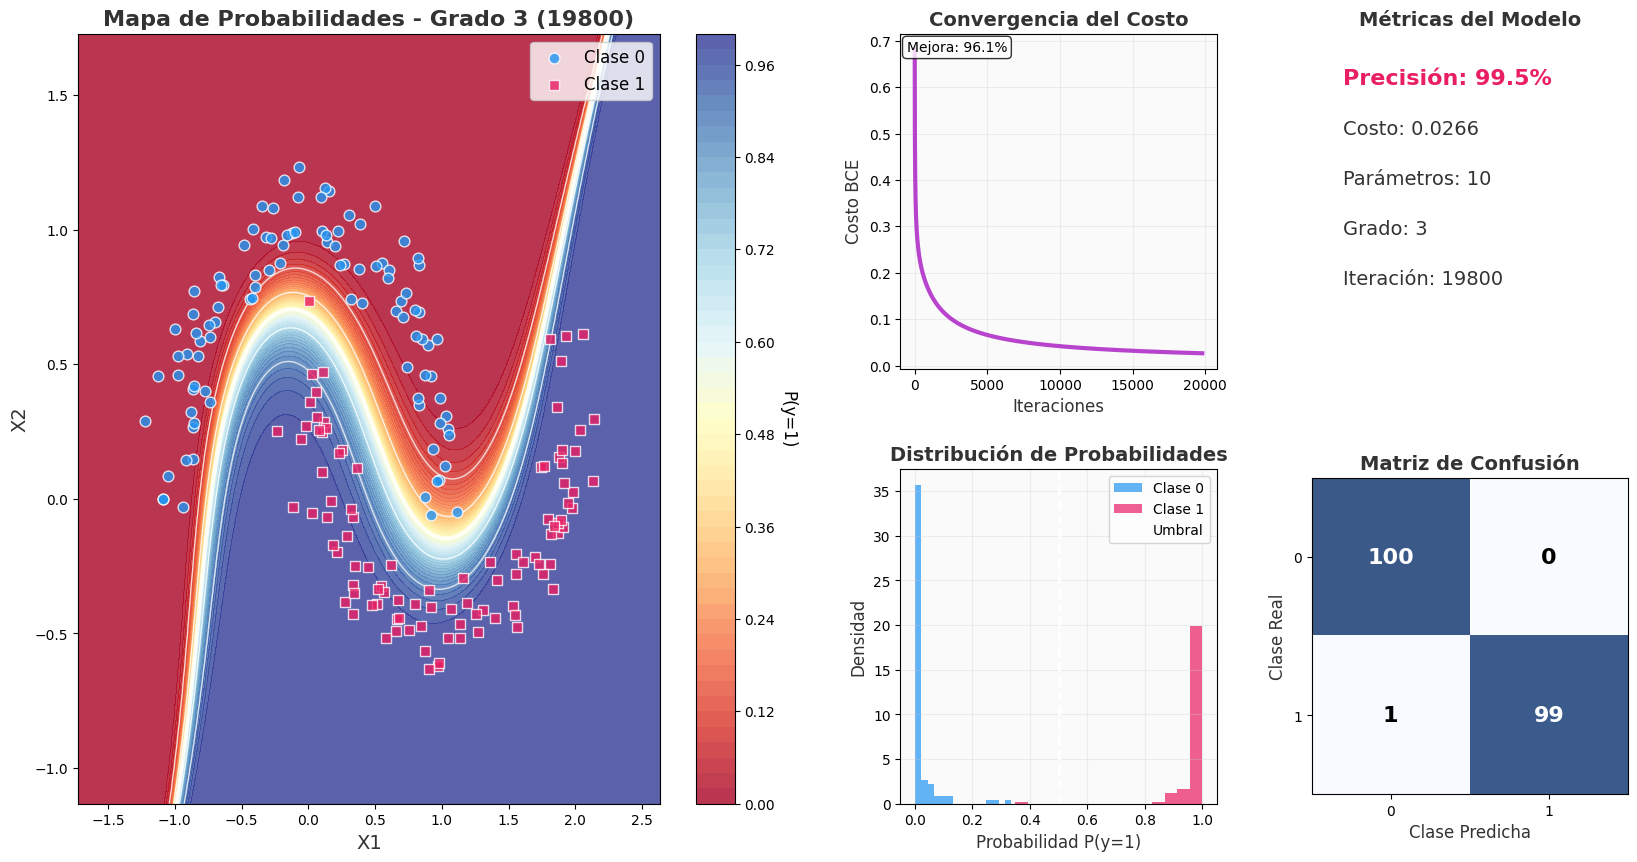

Iteración 19800: Costo=0.0266, Precisión=99.5%, Errores=1/200


In [ ]:
# Configuración del entrenamiento
grado_poly = 3
alpha_poly = 0.1
iteraciones_poly = 20000
mostrar_cada_poly = 300


w_poly_final, costos_poly, w_poly_hist, X_poly_final = gradiente_descendente_poly(
    X, y_true, grado_poly, alpha=alpha_poly, iteraciones=iteraciones_poly, mostrar_cada=mostrar_cada_poly
)